## 1. Business understanding: what are the 3 questions we want to ask?
1.	Do Seattle and Boston follow the same pattern of availability?
2.	Which season is the most popular? 
3.	Which is the most popular neighbourhood in Boston? 


In [662]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [663]:
# Read in data and drop all columns where all values are NaN
bos_cal=pd.read_csv('airbnb_data/boston_calendar.csv').dropna(axis=1, how='all')
bos_list=pd.read_csv('airbnb_data/boston_listings.csv').dropna(axis=1, how='all')
bos_rev=pd.read_csv('airbnb_data/boston_reviews.csv').dropna(axis=1, how='all')
sea_cal=pd.read_csv('airbnb_data/seattle_calendar.csv').dropna(axis=1, how='all')
sea_list=pd.read_csv('airbnb_data/seattle_listings.csv').dropna(axis=1, how='all')
sea_rev=pd.read_csv('airbnb_data/seattle_reviews.csv').dropna(axis=1, how='all')

## 2. Data understanding:

In [664]:
## Investigate the datasets
## Un-comment to view ##
#bos_cal.head()
#bos_list.head()
#bos_rev.head()
#sea_cal.head()
#sea_list.head()
#sea_rev.head()

## View the number of columns in the listings dataset
## Un-comment to view ##
#bos_list.shape
#sea_list.shape

In [665]:
# View all column names of the listing dataframes
list_col_bos=bos_list.columns.tolist()
list_col_sea=sea_list.columns.tolist()
## Un-comment to view ##
#list_col_bos
#list_col_sea

In [666]:
# Rename id in bos_list and sea_list to be listing_id for clarity
bos_list=bos_list.rename(columns={'id':'listing_id'})
sea_list=sea_list.rename(columns={'id':'listing_id'})

In [667]:
# Drop unneccessary columns
bos_list=bos_list.drop(['listing_url','thumbnail_url','medium_url','picture_url','xl_picture_url',
               'host_url', 'host_thumbnail_url','host_picture_url'], axis=1)

In [668]:
# List all columns in the calendar dataframe - used for understanding the data.
cal_col=bos_cal.columns.tolist()
## Un-comment to view ##
#cal_col

In [669]:
# List all columns in the review dataframe  - used for understanding the data.
rev_col=bos_rev.columns.tolist()
## Un-comment to view ##
#rev_col

In [670]:
# Check how many of each column are null in the Boston calendar dataframe as a percentage of all listings
bos_cal.isnull().sum()/bos_cal.shape[0]*100
# 50% of price are null

listing_id     0.000000
date           0.000000
available      0.000000
price         50.871578
dtype: float64

In [671]:
# Can we find the prices in the listings dataframe?
bos_list.columns
# Price is included as a column in the listings dataframe
# Check if the number of NaN values in the listings dataframe is equal to that in the calendar dataframe 
list_null = bos_list['price'].isnull().sum()
cal_null = bos_cal['price'].isnull().sum()

if list_null == cal_null:
    print('There are the same number of NaNs in the price column of the listings dataset and the calendar dataset')
elif list_null < cal_null:
    print('There are less NaNs in the price column of the listings dataset than the calendar dataset')
else:
    print('There are more NaNs in the price column of the listings dataset than the calendar dataset')

There are less NaNs in the price column of the listings dataset than the calendar dataset


In [672]:
# Create a dataframe where all the availability is false
bos_cal_f = bos_cal[bos_cal['available']=='f']
sea_cal_f = sea_cal[sea_cal['available']=='f']

# Check if price is always NaN for when availability is false
no_of_f_bos = bos_cal_f.shape[0]
val_count_bos = bos_cal_f['price'].isnull().sum()
print('For Boston, the number of dates where availability is false for listings is ' + str(no_of_f_bos))
print('For Boston, the number of prices values which are nulls for dates where availability is false for listings is ' 
      + str(val_count_bos))
no_of_f_sea = sea_cal_f.shape[0]
val_count_sea = sea_cal_f['price'].isnull().sum()
print('For Seattle, the number of dates where availability is false for listings is ' + str(no_of_f_sea))
print('For Seattle, the number of prices values which are nulls for dates where availability is false for listings is ' 
      + str(val_count_sea))
# We can conclude that the price is always shown as NaN when a listing is booked. 
# Therefore the price column is not useful to us, so we will drop it.

For Boston, the number of dates where availability is false for listings is 665853
For Boston, the number of prices values which are nulls for dates where availability is false for listings is 665853
For Seattle, the number of dates where availability is false for listings is 459028
For Seattle, the number of prices values which are nulls for dates where availability is false for listings is 459028


**Data understanding findings**:
- The listings datasets are the largest, containing 83 column headings for the Boston listing, and 91 column headings for the Seattle listings
- The calendar datasets detail the availability of a listing. When the value for available is false, the price is always NaN.
- The reviews datasets contains all reviews

## 3. Data preparation:
There is a large amount of missing data in the price column of the calendar datasets – we need to handle this.

In [673]:
# Drop price column from calendar dataframe
bos_cal=bos_cal.drop('price', axis=1)
sea_cal=sea_cal.drop('price', axis=1)

## 4. Analyze and visualise:

### Q1: Do Seattle and Boston follow the same pattern of availability?

In [674]:
# Convert the available column into a boolean column
my_dict = {'t': True, 'f': False}

bos_cal['available']=bos_cal['available'].map(my_dict)
sea_cal['available']=sea_cal['available'].map(my_dict)

,listing_id,date,available
0,12147973,2017-09-05,False
1,12147973,2017-09-04,False
2,12147973,2017-09-03,False
3,12147973,2017-09-02,False
4,12147973,2017-09-01,False
...,...,...,...
1308885,14504422,2016-09-10,False
1308886,14504422,2016-09-09,False
1308887,14504422,2016-09-08,False
1308888,14504422,2016-09-07,False


In [675]:
# Drop all rows where the date value is null
sea_cal=sea_cal.dropna(axis=0, subset=['date'])
bos_cal=bos_cal.dropna(axis=0, subset=['date'])

In [676]:
# Calculate what percentage of listings are available on a certain date. 
# The higher the percentage the more properties are available.
prc_av_bos = bos_cal.groupby('date')['available'].sum()/bos_cal.groupby('date').size()*100
prc_av_sea = sea_cal.groupby('date')['available'].sum()/sea_cal.groupby('date').size()*100

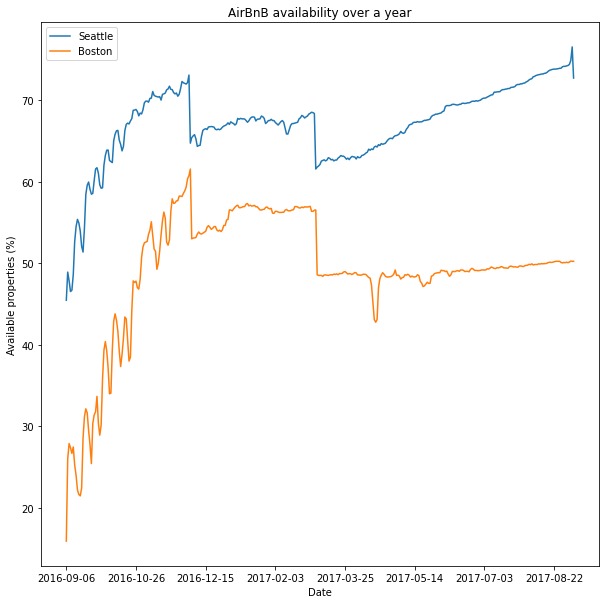

In [677]:
# Plot the percentage of available listings by date, for both Boston and Seattle.
fig, ax = plt.subplots()
prc_av_sea.plot(figsize=(10,10), label = 'Seattle')
prc_av_bos.plot(figsize=(10,10), label = 'Boston')
plt.legend()
plt.title('AirBnB availability over a year')
plt.xlabel('Date')
plt.ylabel('Available properties (%)')
plt.show()
# The higher the percentage the more properties are available.
# We can conclude that Seattle and Boston follow roughly the same patterns of availability.

### Q2: Which season is the most popular? 

To analyse this we need to group dates into seasons.

The dataframes have data for a whole year from 09/2016-08/2017.

We will group as follows, using the numeric value of the month:

- 09, 10, 11 = Autumn
- 12, 01, 02 = Winter
- 03, 04, 05 = Spring
- 06, 07, 08 = Summer


In [678]:
# Convert the dates to datetime format
bos_cal['date'] = pd.to_datetime(bos_cal['date'], format='%Y-%m-%d')
sea_cal['date'] = pd.to_datetime(bos_cal['date'], format='%Y-%m-%d')

In [679]:
# Drop NaN values
bos_cal=bos_cal.dropna(axis=0, subset=['date'])
sea_cal=sea_cal.dropna(axis=0, subset=['date'])

In [680]:
# Create a function to extract the month from the date and identify it as one of the seasons.
def month_season(date):
    '''Takes the month and returns the associated season'''
    if date.month in [9, 10, 11]:
        return 'Autumn'
    elif date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    else:
        return 'NaN'

In [681]:
# Define a new season column
bos_cal['season'] = bos_cal['date'].apply(month_season)
sea_cal['season'] = sea_cal['date'].apply(month_season)

In [682]:
# Calculate the percentage booked/unavailable by season
season_av_bos = (1-(bos_cal.groupby('season')['available'].sum()/bos_cal.groupby('season').size()))*100
season_av_sea = (1-(sea_cal.groupby('season')['available'].sum()/sea_cal.groupby('season').size()))*100
season_av_sea

season
Autumn    30.279230
Spring    33.017289
Summer    34.664395
Winter    34.462725
dtype: float64

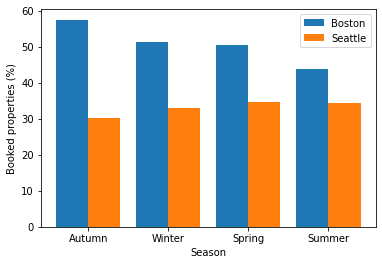

In [683]:
# Plot the percentage of listings booked by season, comparing Boston and Seattle
x=['Autumn', 'Winter', 'Spring', 'Summer']
x_ax= np.arange(len(x))

plt.bar(x_ax-0.2, season_av_bos, width=0.4, label='Boston')
plt.bar(x_ax+0.2, season_av_sea, width=0.4, label='Seattle')
plt.xticks(x_ax, x)
plt.xlabel('Season')
plt.ylabel('Booked properties (%)')
plt.legend()
plt.show()

### Q3: Where is the highest ranked neighbourhood in Boston?

In [684]:
# Filter the bos_list dataframe for neighbourhood and review columns.
bos_list_nbhd = bos_list[['neighbourhood', 
                        'neighbourhood_cleansed', 
                        'number_of_reviews',
                        'first_review',
                        'last_review',
                        'review_scores_rating',
                        'review_scores_accuracy',
                        'review_scores_cleanliness',
                        'review_scores_checkin',
                        'review_scores_communication',
                        'review_scores_location',
                        'review_scores_value']]
# View the data types, to check review scores are numeric
bos_list_nbhd.dtypes

neighbourhood                   object
neighbourhood_cleansed          object
number_of_reviews                int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [685]:
# Calculate average score for each review category for all neighbourhoods
bos_nbhd_avg=bos_list_nbhd.groupby(['neighbourhood']).mean().reset_index()

In [686]:
# Find the highest rated neighbourhood for each category
highest_rating=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_rating'].idxmax()]
highest_acc=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_accuracy'].idxmax()]
highest_clean=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_cleanliness'].idxmax()]
highest_check=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_checkin'].idxmax()]
highest_comms=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_communication'].idxmax()]
highest_loc=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_location'].idxmax()]
highest_val=bos_nbhd_avg['neighbourhood'].iloc[bos_nbhd_avg['review_scores_value'].idxmax()]

**Here are the results**:

highest_rating = Brookline

highest_acc = Brookline

highest_clean = Brookline

highest_check = Financial District

highest_comms = Brookline

highest_loc = Brookline

highest_val = Financial District

**Brookline appears to be the best performing area.**

In [687]:
# Investigate the average number of reviews per neighbourhood, vs. the average number for Brookline
print('The average number of reviews per property across neighbourhoods is ' + 
      str(bos_nbhd_avg['number_of_reviews'].mean()))
# The mean is 16 reviews
print('The average number of reviews per property for Brookline is ' + 
      str(bos_nbhd_avg[bos_nbhd_avg['neighbourhood']=='Brookline']['number_of_reviews'].mean()))

The average number of reviews per property across neighbourhoods is 16.036019710577804
The average number of reviews per property for Brookline is 0.75


The significantly small number of reviews per property, in comparison to the average, could explain why Brookline is ranked so highly.
We will recalculate these values for only neighbourhoods which contain at least 10 reviews per property on average. 

In [688]:
# Filter for only neighbourhoods with at least 10 reviews per property on average. 
bos_nbhd_avg_filt=bos_nbhd_avg.query('number_of_reviews>=10.0').reset_index()

In [689]:
# Find the highest rated neighbourhood for each category
highest_rating=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_rating'].idxmax()]
highest_acc=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_accuracy'].idxmax()]
highest_clean=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_cleanliness'].idxmax()]
highest_check=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_checkin'].idxmax()]
highest_comms=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_communication'].idxmax()]
highest_loc=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_location'].idxmax()]
highest_val=bos_nbhd_avg_filt['neighbourhood'].iloc[bos_nbhd_avg_filt['review_scores_value'].idxmax()]

**Here are the results**:

highest_rating = Leather District

highest_acc = Roslindale

highest_clean = West Roxbury

highest_check = Leather District

highest_comms = West Roxbury

highest_loc = Government Center

highest_val = Leather District

**The Leather District ranked top on 3/7 categories.**